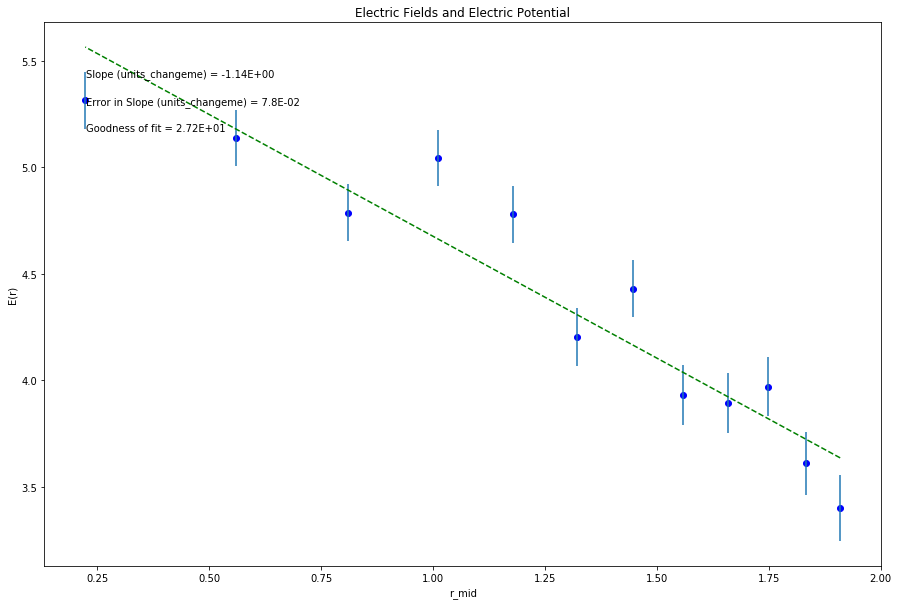

In [3]:
#Physics 216
#Plotting code to use the whole year!
#Jaylene Naylor
#September 2015, modified Sept 2017, August 2018
#-------------------------------------------#
%matplotlib inline
#Import packages and libraries needed and give them shortcut names
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt

#-------------------------------------------#
#Data Section - Create Arrays for data. Perform necessary calculations
#CHANGE THE VARIABLE NAMES and numbers to match your data
r_mid = np.array([1.909542505,1.832581464,1.749199855,1.658228077,1.558144618,1.446918983,1.32175584,1.178654996,1.011600912,0.8109302162,0.5596157879,0.2231435513]) #what are units?
E_r = np.array([3.401197382,3.610917913,3.970291914,3.891820298,3.931825633,4.430816799,4.204692619,4.779123493,5.043425117,4.787491743,5.135798437,5.313205979]) #what are units?


#--------------------------------------------#
#Create arrays for uncertainties
#CHANGE THE VARIABLE NAME and numbers to match your data 
err_E_r = np.array([0.15551466,0.14768179,0.13944565,0.14081598,0.14009256,0.13445533,0.1363687,0.13274914,0.13204585,0.1327208,0.13187486,0.13162267])


#--------------------------------------------#
#Re-assign variables as x, y, dy so that the following code may remain generic

x = r_mid  #this should be the array you want to plot on the x axis
y = E_r
dy = err_E_r #this should be your error in y array

#----------------------------------------------#
#Don't need to change anything in this section!
 
#Find the intercept and slope, b and m, from Python's polynomial fitting function
b,m=np.polynomial.polynomial.polyfit(x,y,1,w=dy)

#Write the equation for the best fit line based on the slope and intercept
fit = b+m*x

#Calculate the error in slope and intercept 
#def Delta(x, dy) is a function, and we will learn how to write our own at a later date. They are very useful!
def Delta(x, dy):
    D = (sum(1/dy**2))*(sum(x**2/dy**2))-(sum(x/dy**2))**2
    return D
 
D=Delta(x, dy)
 
dm = np.sqrt(1/D*sum(1/dy**2)) #error in slope
db = np.sqrt(1/D*sum(x**2/dy**2)) #error in intercept

#Calculate the "goodness of fit" from the linear least squares fitting document
def LLSFD2(x,y,dy):
    N = sum(((y-b-m*x)/dy)**2)
    return N
                      
N = LLSFD2(x,y,dy)

#-----------------------------------------------------------------------#
#Plot data on graph. Plot error bars and place values for slope, error in slope and goodness of fit on the plot using "annotate"
plt.figure(figsize=(15,10))
 
plt.plot(x, fit, color='green', linestyle='--')
plt.scatter(x, y, color='blue', marker='o')
 
 
#create labels  YOU NEED TO CHANGE THESE!!!
plt.xlabel('r_mid')
plt.ylabel('E(r)')
plt.title('Electric Fields and Electric Potential')
 
plt.errorbar(x, y, yerr=dy, xerr=None, fmt="none") #don't need to plot x error bars
 
plt.annotate('Slope (units_changeme) = {value:.{digits}E}'.format(value=m, digits=2),
             (0.05, 0.9), xycoords='axes fraction')
 
plt.annotate('Error in Slope (units_changeme) = {value:.{digits}E}'.format(value=dm, digits=1),
             (0.05, 0.85), xycoords='axes fraction')
 
plt.annotate('Goodness of fit = {value:.{digits}E}'.format(value=N, digits=2),
             (0.05, 0.80), xycoords='axes fraction')

plt.show()


#Error analysis
δV = 0.01
δ∆V = 0.014
δr = 0.0005 #m
δ∆r = 0.0007 #m
δr_mid = δ∆r/2 = 0.00035 #m
δE_r =[5.04777179,5.88832744,7.93072506,7.40942643,7.66939372,12.08873856,9.78899382,16.89365561,21.87989945,17.03173508,23.96413988,28.55759794]
δln(E(r)) =[0.15551466 0.14768179 0.13944565 0.14081598 0.14009256 0.13445533
 0.1363687  0.13274914 0.13204585 0.1327208  0.13187486 0.13162267]

In [4]:
def Rule_3 (deltaa,deltab):
    delta3Q = (((deltaa)**2)+((deltab)**2))**(1/2)
    return delta3Q

deltaa = 0.01
deltab = 0.01

Rule3 = Rule_3 (deltaa,deltab)
print ("Rule 3 = ",Rule3,"δ delta V")

Rule 3 =  0.01414213562373095 δ delta V


In [5]:
def Rule_3r (deltaa,deltab):
    delta3r = (((deltaar)**2)+((deltabr)**2))**(1/2)
    return delta3r5.04777179,5.88832744,7.93072506,7.40942643,7.66939372,12.08873856,9.78899382,16.89365561,21.87989945,17.03173508,23.96413988,28.55759794

deltaar = 0.0005
deltabr = 0.0005

Rule3r = Rule_3r (deltaa,deltab)
print ("Rule 3 = ",Rule3r,"δ delta r")

SyntaxError: invalid syntax (<ipython-input-5-e9ae7c55c292>, line 3)

In [6]:
def Rule_4 (Q,deltaA,A,deltaB,B ):
    delta4Q = Q*((((deltaA/A)**2)+((deltaB/B)**2))**(1/2))
    return delta4Q


In [7]:
import numpy as np
Q_array = np.array([30,37,53,49,51,84,67,119,155,120,170,203])
deltaA = 0.014
A_array = np.array([0.15,0.185,0.265,0.245,0.255,0.42,0.335,0.595,0.775,0.6,0.85,1.015])
deltaB = 0.0007
B = 0.005


Rule4 = Rule_4 (Q_array,deltaA,A_array,deltaB,B)
print ("δE_r = ",Rule4,)

δE_r =  [ 5.04777179  5.88832744  7.93072506  7.40942643  7.66939372 12.08873856
  9.78899382 16.89365561 21.87989945 17.03173508 23.96413988 28.55759794]


In [8]:
E_r = [30,37,53,49,51,84,67,119,155,120,170,203]
δE_r = [5.04777179,5.88832744,7.93072506,7.40942643,7.66939372,12.08873856,9.78899382,16.89365561,21.87989945,17.03173508,23.96413988,28.55759794]

E_rplusδE_r = np.add (E_r,δE_r)
print (E_rplusδE_r)

[ 35.04777179  42.88832744  60.93072506  56.40942643  58.66939372
  96.08873856  76.78899382 135.89365561 176.87989945 137.03173508
 193.96413988 231.55759794]


In [9]:
def brute_force (natural_logE_r, natural_logE_rplusδE_r):
    δnatural_logE_r = natural_logE_rplusδE_r-natural_logE_r
    return δnatural_logE_r
import numpy as np
natural_logE_r = np.array([3.401197382,3.610917913,3.970291914,3.891820298,3.931825633,4.430816799,4.204692619,4.779123493,5.043425117,4.787491743,5.135798437,5.313205979])
natural_logE_rplusδE_r = np.array([3.556712039,3.758599701,4.109737564,4.03263628,4.071918189,4.565272125,4.34106132,4.911872636,5.175470968,4.920212542,5.267673296,5.444828646])
bruteforce = brute_force (natural_logE_r,natural_logE_rplusδE_r)
print (bruteforce)

[0.15551466 0.14768179 0.13944565 0.14081598 0.14009256 0.13445533
 0.1363687  0.13274914 0.13204585 0.1327208  0.13187486 0.13162267]
